<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/Machine_Learning/blob/main/machinelearning_maquinas_de_vetores_de_suporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center"> Machine Learning: Support Vector Machines

Data Scientist Jr.: Karina Gonçalves Soares

Link de estudo:

* [Machine Learning: Support Vector Machines](https://github.com/EddyGiusepe/Machine_Learning/blob/main/4_ML_Support_Vector_Machines.ipynb)

#Máquina de Vetores de Suporte (Support Vector Machine: SVM)

É um algoritmo de aprendizado de máquina supervisionado que pode ser usado para desafios de classificação ou regressão. No entanto, é usado principalmente em problemas de classificação.

Essencialmente, o algoritmo de SVM é responsável por encontrar a melhor fronteira de separação entre classes/rótulos possível para um dado conjunto de dados que sejam linearmente separáveis. Para o SVM, as diversas fronteiras de separação possíveis que são capazes de separar completamente as classes são chamadas de hiperplanos. Dessa forma, o SVM busca encontrar o melhor hiperplano para um dado dataset cujas classes são linearmente separáveis. Podemos visualizar essa ideia através do cenário base de classificação (binária).

Em um dataset bidimensional, o hiperplano é uma reta. Em um dataset tridimensional, o hiperplano é de fato um plano. E assim sucessivamente

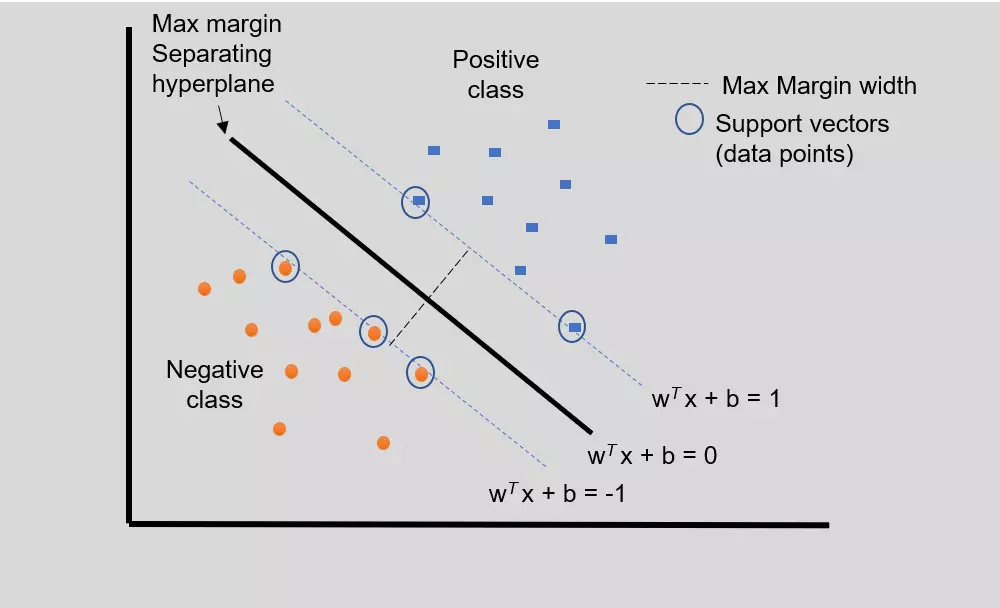

#Classificação Linear com SVM

Enquanto os modelos de Regressão Linear se baseiam na ideia de MINIMIZAR o número de erros, o algoritmo SVM tenta MAXIMIZAR a distância entre as fronteiras de decisão e os Dados de treinamento: A margem.

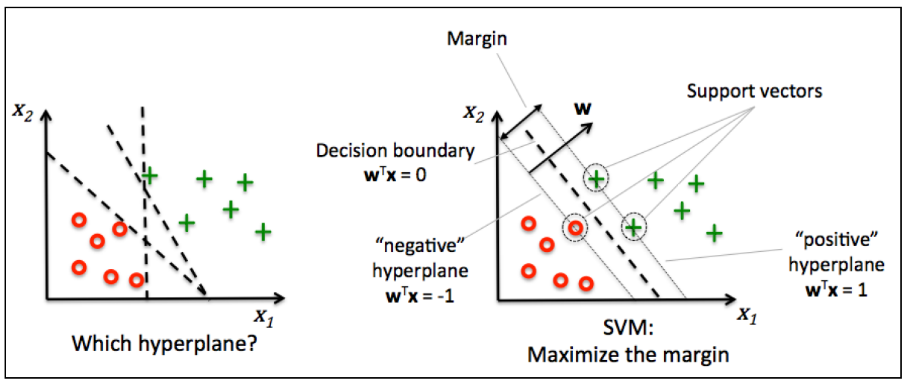

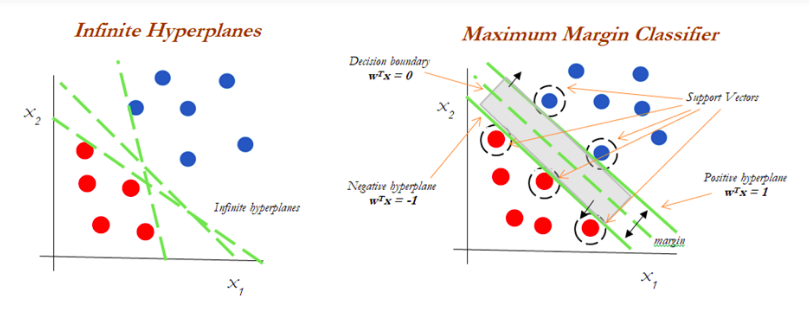

Adicionar mais Dados fora da Margem não afeta o modelo já que está totalmente determinado pelas instâncias localizadas nos limites da Fronteira: OS VETORES DE SUPORTE. Isto só funciona se os Dados são linearmente separáveis, em caso contrário devemos aceitar um certo número de erros (na seção seguinte veremos como fazer isso com um modelo linear).

Em scikit-learn podemos usar o modelo LinearSVC para treinar um classificador linear com SVM. A seguir veremos um exemplo de como ajustar o número de erros aceitáveis na classificação (instâncias dentro da Margem) com o Dataset Iris (já usados em outros scripts).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings(action='ignore')

# Carregamos o Dataset (usamos dois features e apenas uma classe)
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica, apenas uma Target

print("shape de X: ", X.shape)
print("shape de y: ", y.shape)
print("")

# Normalizar nossos Datos (usando a Média e Desvio padrão)
scaler = StandardScaler()

# SVMs (dois diferentes valores de C). C=1 é por Default. C é um parâmetro de Regularização
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

# Treinar os seguintes dois modelos
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

# Aqui treinamos os Modelos
print(scaled_svm_clf1.fit(X, y))
print("")
print(scaled_svm_clf2.fit(X, y))

shape de X:  (150, 2)
shape de y:  (150,)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])


## Algumas LOSS

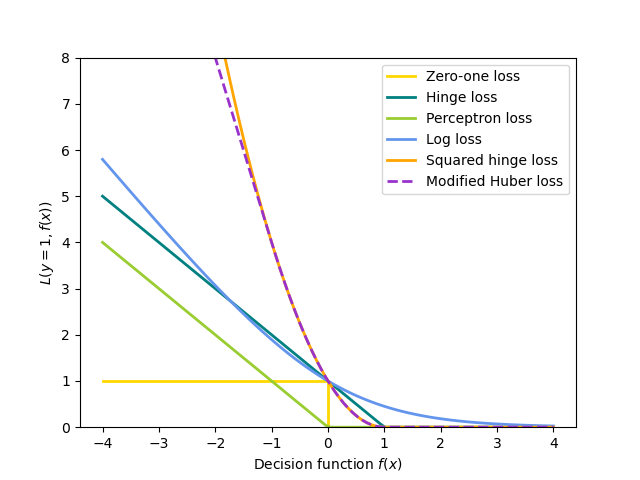

In [3]:
# Extrair as fronteiras de decisão (não normalizadas)
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Calcular vetores de suporte
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

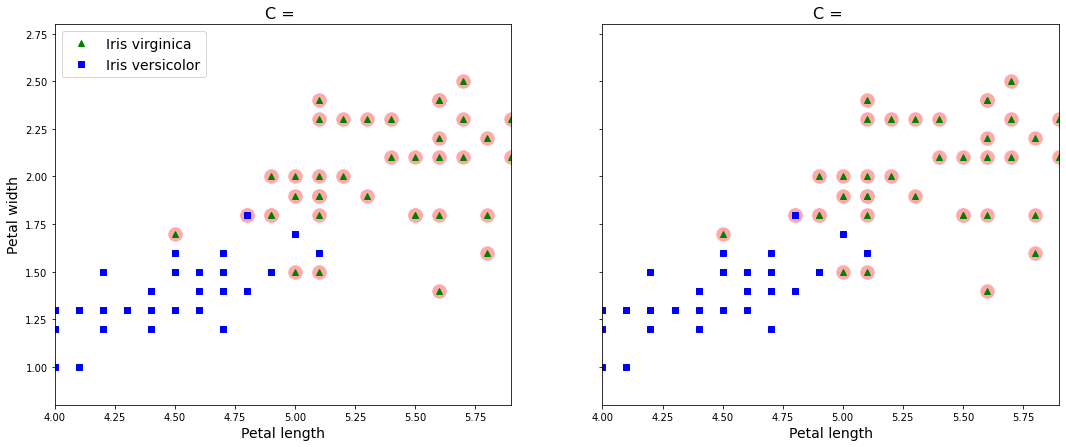

In [19]:
# Visualizar fronteiras de Decisão
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(18,7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("C = ".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("C = ".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()
     